In [1]:
import pandas as pd

file_path = r'C:\Users\zhang\Desktop\md\2024corning\july\tension_las\14kout_tension_out.xyz'
# file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\data\15cry_300k_out.xyz'
# 打开一个文本文件，准备写入 strain 数据
output_file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\tension\strain_x.txt'

is_x = 0
is_y = 1 

In [2]:
#
start_frame = 0
end_frame = 101
step_frame = 1
#

In [3]:
# 存储原子坐标的列表
atom_data = []
# 
with open(file_path, 'r') as f:
    n_lines = 0
    n_atoms = 0
    n_frames = 0
    for line in f:
        tmp_line = line.split()
        if tmp_line:
            if n_lines == 0:
                n_atoms = int(tmp_line[0])
                n_lines += 1
            if tmp_line[0] == 'Atoms':
                n_frames += 1
print(n_lines, n_frames, n_atoms)


1 101 5005


In [4]:
atom_data

[]

In [17]:
# 读一帧  分析一帧
list_x = []
list_y = []
file = open(file_path, 'r')
output_file = open(output_file_path, 'w')
for frame in range(start_frame,end_frame,step_frame):
    print('analysis frame: ',frame)
    num_atoms = int(file.readline())
    # 跳过Atoms
    file.readline()
    
    x_list,y_list,z_list = [],[],[]
    x_min,y_min,z_min = float('inf'),float('inf'),float('inf')   # 正无穷
    x_max,y_max,z_max = float('-inf'),float('-inf'),float('-inf')  # 负无穷
    name  = 'X'
    for atom in range(num_atoms):
        row_atom = file.readline().split()
        x,y,z = float(row_atom[1]),float(row_atom[2]),float(row_atom[3])
        row_atom = [row_atom[0],x,y,z]
        #print(row_atom)
        
        if x > x_max:
            x_max = x
        if y > y_max:
            y_max = y
        if z > z_max:
            z_max = z
        if x < x_min:
            x_min = x
        if y < y_min:
            y_min = y
        if z < z_min:
            z_min = z
        temp_max,temp_min = 0,0
        if is_x==1:
            temp_max,temp_min = x_max,x_min
        elif is_y ==1:
            name = 'Y'
            temp_max,temp_min = y_max,y_min
        # 记下初始长度
        if frame==0:
                len_x0 = temp_max - temp_min
        delta_x = temp_max - temp_min
    
    print('temp_min: ' + str(temp_min)+' temp_max:  ' +str(temp_max))
    #print('y_min: ' + str(y_min)+' y_max:  ' +str(y_max))
    #print('z_min: ' + str(z_min)+' z_max:  ' +str(z_max))
    print(f'当下{name}轴长度：{round(delta_x,2)}, 原始{name}轴长度：{round(len_x0,2)}')
    strain = (delta_x - len_x0)/len_x0
    list_x.append(frame)
    list_y.append(strain)
    print(f'应变为: {round(strain,3)}, 增长的长度为{round(delta_x - len_x0,2)}' )
    #将所求的应变strain数据导出
    #output_file.write(f'{frame} {strain}\n')
    output_file.write(f'{strain}\n')
output_file.close()
file.close()

analysis frame:  0
temp_min: 16.598455 temp_max:  76.536835
当下Y轴长度：59.94, 原始Y轴长度：59.94
应变为: 0.0, 增长的长度为0.0
analysis frame:  1
temp_min: 16.571105 temp_max:  76.644435
当下Y轴长度：60.07, 原始Y轴长度：59.94
应变为: 0.002, 增长的长度为0.13
analysis frame:  2
temp_min: 16.517425 temp_max:  76.725735
当下Y轴长度：60.21, 原始Y轴长度：59.94
应变为: 0.005, 增长的长度为0.27
analysis frame:  3
temp_min: 16.449565 temp_max:  76.792935
当下Y轴长度：60.34, 原始Y轴长度：59.94
应变为: 0.007, 增长的长度为0.4
analysis frame:  4
temp_min: 16.356925 temp_max:  76.835235
当下Y轴长度：60.48, 原始Y轴长度：59.94
应变为: 0.009, 增长的长度为0.54
analysis frame:  5
temp_min: 16.256095 temp_max:  76.869435
当下Y轴长度：60.61, 原始Y轴长度：59.94
应变为: 0.011, 增长的长度为0.67
analysis frame:  6
temp_min: 16.162325 temp_max:  76.910635
当下Y轴长度：60.75, 原始Y轴长度：59.94
应变为: 0.014, 增长的长度为0.81
analysis frame:  7
temp_min: 16.088125 temp_max:  76.971435
当下Y轴长度：60.88, 原始Y轴长度：59.94
应变为: 0.016, 增长的长度为0.94
analysis frame:  8
temp_min: 16.032175 temp_max:  77.050535
当下Y轴长度：61.02, 原始Y轴长度：59.94
应变为: 0.018, 增长的长度为1.08
analysis frame

temp_min: 12.151305 temp_max:  82.619635
当下Y轴长度：70.47, 原始Y轴长度：59.94
应变为: 0.176, 增长的长度为10.53
analysis frame:  79
temp_min: 12.081855 temp_max:  82.685235
当下Y轴长度：70.6, 原始Y轴长度：59.94
应变为: 0.178, 增长的长度为10.67
analysis frame:  80
temp_min: 12.030465 temp_max:  82.768835
当下Y轴长度：70.74, 原始Y轴长度：59.94
应变为: 0.18, 增长的长度为10.8
analysis frame:  81
temp_min: 11.985825 temp_max:  82.859135
当下Y轴长度：70.87, 原始Y轴长度：59.94
应变为: 0.182, 增长的长度为10.93
analysis frame:  82
temp_min: 11.931205 temp_max:  82.939535
当下Y轴长度：71.01, 原始Y轴长度：59.94
应变为: 0.185, 增长的长度为11.07
analysis frame:  83
temp_min: 11.885735 temp_max:  83.029035
当下Y轴长度：71.14, 原始Y轴长度：59.94
应变为: 0.187, 增长的长度为11.2
analysis frame:  84
temp_min: 11.847605 temp_max:  83.125935
当下Y轴长度：71.28, 原始Y轴长度：59.94
应变为: 0.189, 增长的长度为11.34
analysis frame:  85
temp_min: 11.811955 temp_max:  83.225335
当下Y轴长度：71.41, 原始Y轴长度：59.94
应变为: 0.191, 增长的长度为11.48
analysis frame:  86
temp_min: 11.764015 temp_max:  83.312335
当下Y轴长度：71.55, 原始Y轴长度：59.94
应变为: 0.194, 增长的长度为11.61
analysis frame: 

In [14]:
import matplotlib.pyplot as plt


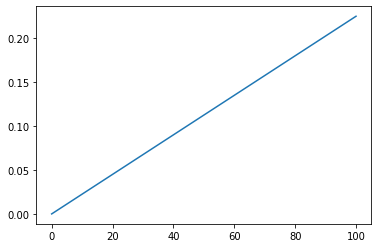

In [18]:
plt.plot(list_x,list_y)

In [11]:
list_plt[0]

[0, 0.0]

In [19]:
len(list_plt)

101